# Info
Name:  

    ORACLES_aerosol_input

Purpose:  

    Compare the input of aerosol properties for cloud retrievals. For perparing the aerosol file in Preperation_ORACLES
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2016-11-04
    

# Prepare the python environment

In [1]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
fp = 'C:\\Users\\sleblan2\\Research\\ORACLES\\'

# Get the possible aerosol values

In [21]:
aero = []

In [22]:
# from original first try at aerosol properties
aero.append({'z_arr':[2.0,5.0],
           'ext':np.array([0.6,0.4,0.10,0.04]),
           'ssa':np.array([0.8,0.85,0.9,0.95]),
           'asy':np.array([0.8,0.8,0.8,0.8]),
           'wvl_arr':[400.0,500.0,650.0,940.0],
           'disort_phase':False,
           'expand_hg':True,
           'label':'v1'})

In [23]:
# from aeeronet at St helena on 2016-09-03
aero.append({'ssa':np.array([0.867100,0.844300,0.834100,0.832300]),
                  'asy':np.array([0.655889,0.621976,0.621509,0.627778]),
                  'wvl_arr':[439.0,675.0,870.0,1018.0],
             'label':'St_helena'})

In [24]:
# from aeronet at Ascension on 2016-09-08
aero.append({'ssa':np.array([0.878400,0.859500,0.846800,0.838000]),
                  'asy':np.array([0.695644,0.654167,0.657314,0.669468]),
                  'wvl_arr':[441.0,675.0,871.0,1022.0],
            'label':'Ascension'})

In [25]:
# from aeronet at Namibe on 2016-09-13
aero.append({'ssa':np.array([0.878400,0.859500,0.846800,0.838000]),
                  'asy':np.array([0.699605,0.624855,0.611445,0.631931]),
                  'wvl_arr':[440.0,675.0,869.0,1018.0],
            'label':'Namibe'})

In [26]:
# from aeronet at Lubango on 2016-09-14
aero.append({'ssa':np.array([0.867600,0.832200,0.795800,0.777500]),
                  'asy':np.array([0.672050,0.598835,0.562660,0.556078]),
                  'wvl_arr':[440.0,675.0,869.0,1018.0],
               'label':'Lubango'})

In [28]:
# saved merge properties from the above
aero.append({'ssa':np.array([0.867100,0.844300,0.834100,0.832300]),
                  'asy':np.array([0.699605,0.624855,0.611445,0.631931]),
                  'wvl_arr':[440.0,675.0,869.0,1018.0],
               'label':'v3'})

## Plot the aerosol properties

<IPython.core.display.Javascript object>


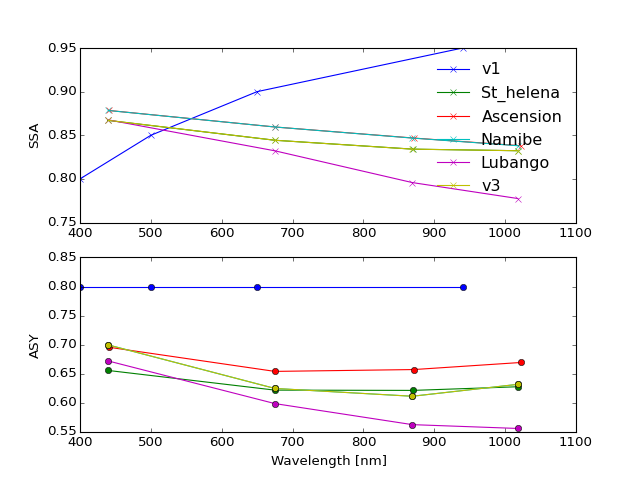

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)
for d in aero:
    ax1.plot(d['wvl_arr'],d['ssa'],'x-',label=d['label'])
    ax2.plot(d['wvl_arr'],d['asy'],'o-',label=d['label'])
ax2.set_xlabel('Wavelength [nm]')
ax1.set_ylabel('SSA')
ax2.set_ylabel('ASY')
ax1.legend(frameon=False,numpoints=1)

## Make a spline interpolation to extend the properties to longer and horter wavelengths

In [30]:
from scipy import interpolate

In [37]:
wvl_new = [350.0,400.0,500.0,650.0,875.0,980.0,1020.0,1240.0,1710.0]

<IPython.core.display.Javascript object>


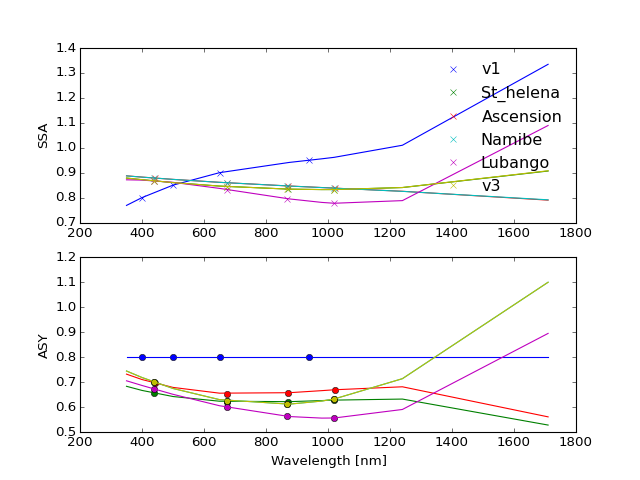

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)
for d in aero:
    l = ax1.plot(d['wvl_arr'],d['ssa'],'x',label=d['label'])
    f_new = interpolate.InterpolatedUnivariateSpline(d['wvl_arr'],d['ssa'],k=3,ext=0)
    ax1.plot(wvl_new,f_new(wvl_new),'-',color=l[0].get_color())
    d['wvl_new'] = wvl_new
    d['ssa_new'] = f_new(wvl_new)
    l2 = ax2.plot(d['wvl_arr'],d['asy'],'o',label=d['label'])
    f2_new = interpolate.InterpolatedUnivariateSpline(d['wvl_arr'],d['asy'],k=3,ext=0)
    ax2.plot(wvl_new,f2_new(wvl_new),'-',color=l2[0].get_color())
    d['asy_new'] = f2_new(wvl_new)
ax2.set_xlabel('Wavelength [nm]')
ax1.set_ylabel('SSA')
ax2.set_ylabel('ASY')
ax1.legend(frameon=False,numpoints=1)

## set the new values

In [45]:
aero[-1]['ssa_new'] = aero[3]['ssa_new']
aero[-1]['asy_new'] = aero[1]['asy_new']

# Get the extinction of the layer in question

In [46]:
from load_utils import mat2py_time, toutc

In [40]:
import scipy.io as sio

In [42]:
s = sio.loadmat(fp+'data\\4STAR_20160914starsun.mat')

In [43]:
s.keys()

['Str',
 'tau_O3_err',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'sd_aero_crit',
 'tau_aero_err',
 'dark',
 'nirVdettemp',
 'Elstep',
 'flagfilename',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'm_err',
 'f',
 'tau_O4_err',
 'flagallcolsitems',
 't',
 'c0mod',
 'tau_tot_slant',
 'track_err',
 'flagallcols',
 'rate',
 'program_version',
 'sat_time',
 'm_O3',
 'visheader',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'QdVtot',
 'tau_aero_err7',
 'tau_aero_err6',
 'tau_aero_err5',
 'nirAVG',
 'tau_aero_err3',
 'tau_aero_err2',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'tau_aero_err8',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_abserr',
 'flagitems',
 'aerosolcols',
 'tau_O3',
 '

In [47]:
s['pyt'] = mat2py_time(s['t'])
s['utc'] = toutc(s['pyt'])

In [48]:
s['tau_aero'].shape

(20641L, 1556L)

<IPython.core.display.Javascript object>


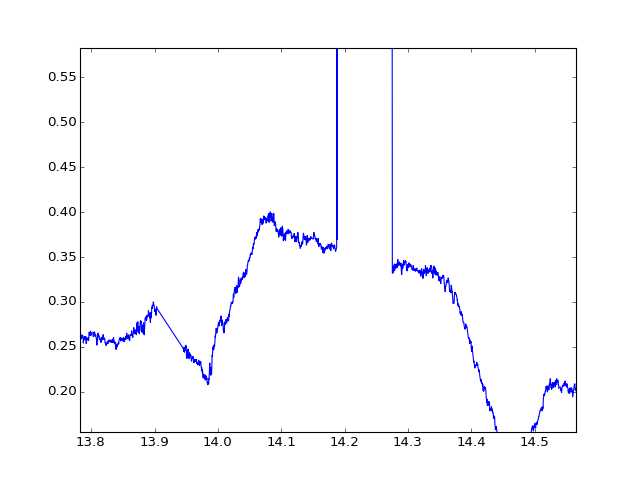

In [50]:
plt.figure()
plt.plot(s['utc'],s['tau_aero'][:,400])

In [51]:
i = np.argmin(abs(s['utc']-14.1))

In [52]:
i

14843

In [53]:
from Sp_parameters import smooth

In [65]:
ss = np.nanmean(s['tau_aero'][i-6:i+6,:],axis=0)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [69]:
s['w'].shape

(1L, 1556L)

<IPython.core.display.Javascript object>


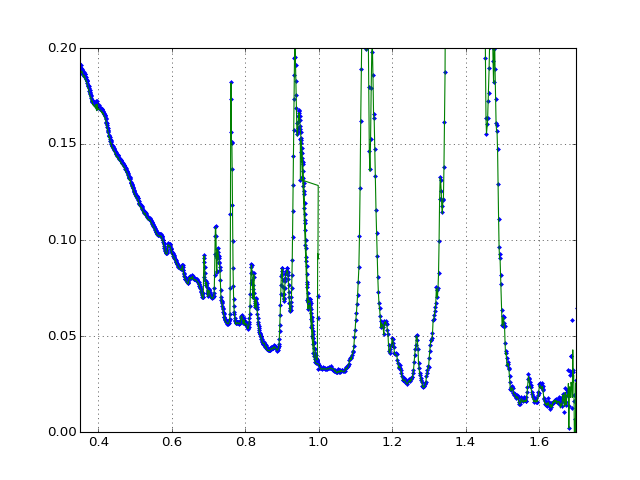

In [80]:
plt.figure()
plt.plot(s['w'][0,:],s['tau_aero'][i,:]/3.0,'.')
plt.plot(s['w'][0,:],ss/3.0)
plt.ylim(0,0.2)
plt.xlim(0.35,1.7)
plt.grid()

In [77]:
ext_new = []
for w in wvl_new:
    iw = np.argmin(abs(s['w']*1000.0-w))
    ext_new.append(ss[iw]/3.0)

<IPython.core.display.Javascript object>


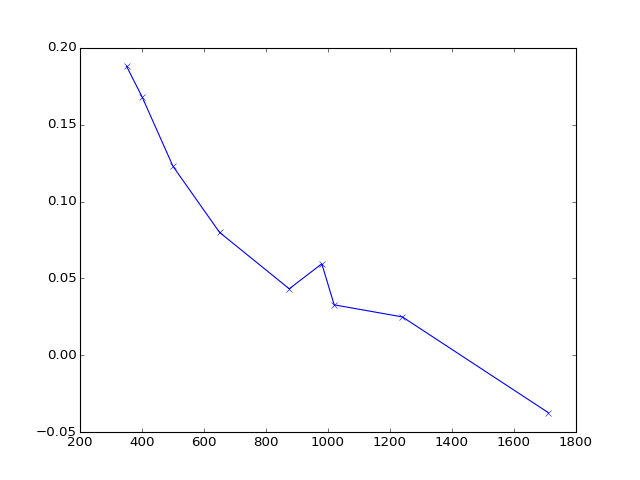

In [78]:
plt.figure()
plt.plot(wvl_new,ext_new,'x-')

In [81]:
ext_new[-1] = 0.015
ext_new[5] = 0.035

In [82]:
ext_new

[0.18817545970280966,
 0.16828886667887369,
 0.12297601501146953,
 0.079984381794929504,
 0.043237209320068359,
 0.035,
 0.032773633797963463,
 0.024930156767368317,
 0.015]

<IPython.core.display.Javascript object>


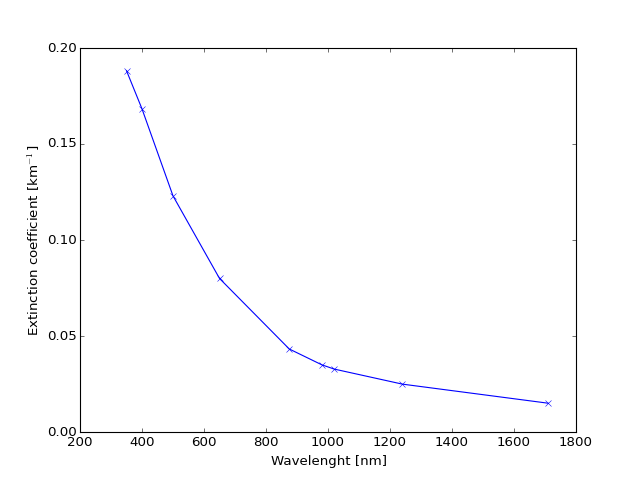

In [88]:
plt.figure()
plt.plot(wvl_new,ext_new,'x-')
plt.ylabel('Extinction coefficient [km$^{{-1}}$]')
plt.xlabel('Wavelenght [nm]')

# Make the dict to be saved and used in next calculations of cloud properties

In [83]:
aero_save = {'z_arr':[2.0,5.0],
        'ext':np.array([ext_new,ext_new]),
        'ssa':np.array([aero[-1]['ssa_new'],aero[-1]['ssa_new']]),
        'asy':np.array([aero[-1]['asy_new'],aero[-1]['asy_new']]),
        'wvl_arr':wvl_new,
        'disort_phase':False,
        'expand_hg':True}

In [85]:
aero_save['ext'][1,:] = aero_save['ext'][1,:]*0.0

In [86]:
aero_save

{'asy': array([[ 0.68328872,  0.66672784,  0.64227709,  0.62344345,  0.62167625,
          0.62605761,  0.62786658,  0.6320782 ,  0.52784278],
        [ 0.68328872,  0.66672784,  0.64227709,  0.62344345,  0.62167625,
          0.62605761,  0.62786658,  0.6320782 ,  0.52784278]]),
 'disort_phase': False,
 'expand_hg': True,
 'ext': array([[ 0.18817546,  0.16828887,  0.12297602,  0.07998438,  0.04323721,
          0.035     ,  0.03277363,  0.02493016,  0.015     ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ]]),
 'ssa': array([[ 0.88708406,  0.8821453 ,  0.87309964,  0.8612953 ,  0.84643443,
          0.84020162,  0.8378846 ,  0.82512145,  0.79110621],
        [ 0.88708406,  0.8821453 ,  0.87309964,  0.8612953 ,  0.84643443,
          0.84020162,  0.8378846 ,  0.82512145,  0.79110621]]),
 'wvl_arr': [350.0, 400.0, 500.0, 650.0, 875.0, 980.0, 1020.0, 1240.0, 1710.0],
 'z_arr': [2.0, 5.0]}

## Save the dict

In [126]:
from load_utils import load_from_json, save_to_json

In [122]:
save_to_json(fp+'aero_save.txt',aero_save)

In [123]:
a = ()

In [127]:
a = load_from_json(fp+'aero_save.txt')